<a href="https://colab.research.google.com/github/hario27/PositionChecker/blob/master/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import json
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def crypto_watch(candle,before,size):
    url="https://api.cryptowat.ch/markets/bitflyer/btcfxjpy/ohlc?periods="
    candle=candle*60
    period=("%s"%(candle))
    period=[period]
    beforeurl="&before="
    afterurl="&after="
    #The maximum size of data is 6000 depending on a timing (sometimes you get less than 6000)
    after= before-(candle*size)
    URL=("%s%s%s%s%s%s"%(url,candle,afterurl,after,beforeurl,before))
    #e.g https://api.cryptowat.ch/markets/bitflyer/btcjpy/ohlc?periods=86400&after=1483196400
    res=json.loads(requests.get(URL).text)["result"]
    data = []
    for i in period:
        row = res[i]
        for column in row:
            if column[4] != 0:
                column = column[0:6]
                data.append(column)
    date = [price[0] for price in data]
    priceOpen = [int(price[1]) for price in data]
    priceHigh = [int(price[2]) for price in data]
    priceLow = [int(price[3]) for price in data]
    priceClose = [int(price[4]) for price in data]
    volume = [int(price[5]) for price in data]
    date_datetime = map(datetime.datetime.fromtimestamp, date)
    dti = pd.DatetimeIndex(date_datetime)
    df_candleStick = pd.DataFrame({"Open" : priceOpen, "High" : priceHigh, "Low": priceLow, "Close" : priceClose, "Volume" : volume}, index=dti)
    df_candleStick["datetime"] = df_candleStick.index
    df_candleStick["datetime"] = pd.to_datetime(df_candleStick["datetime"], utc=True)
    df_candleStick = df_candleStick.set_index('datetime')
    df_candleStick['datetime'] = df_candleStick.index.tz_convert('Asia/Tokyo')
    df_candleStick = df_candleStick.set_index('datetime')
    return df_candleStick
period = 30
df = crypto_watch(period,round(time.time()),6000)
df.to_csv("/content/drive/My Drive/Colab Notebooks/price_data/btcjpy" + str(period) + ".csv", encoding='UTF8')

In [13]:
df

,Open,High,Low,Close,Volume
datetime,,,,,
2020-11-18 11:00:00+09:00,1860585,1866455,1857044,1866292,1733
2020-11-18 11:30:00+09:00,1865619,1866048,1857633,1860990,1662
2020-11-18 12:00:00+09:00,1861140,1864612,1855237,1858643,1639
2020-11-18 12:30:00+09:00,1858574,1861191,1852879,1860742,1598
2020-11-18 13:00:00+09:00,1860782,1897829,1859277,1893908,4227
...,...,...,...,...,...
2021-03-23 08:30:00+09:00,6267046,6295865,6223375,6257602,342
2021-03-23 09:00:00+09:00,6257606,6271438,6189554,6190268,265
2021-03-23 09:30:00+09:00,6190268,6293857,6162370,6258210,439


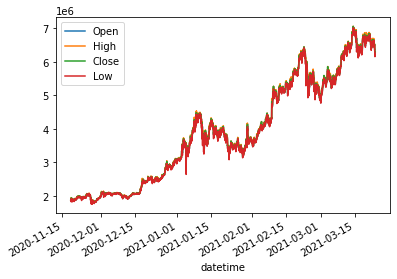

In [14]:
df[["Open", "High", "Close", "Low"]].plot()

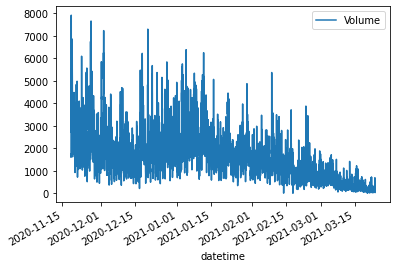

In [15]:
df[["Volume"]].plot()